Оцінювання наявності даної роботи буде враховувати як наявність самих візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання не буде зараховане за наявне.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [26]:
df = pd.read_csv('train.csv')

print("Dataframe information:")
print(df.info())

print("\nIndex information:")
print(df.index)

print("\nData types in each column:")
print(df.dtypes)

print("\nNumber of non-missing values ​​in each column:")
print(df.count())

print("\nFirst 5 rows of the dataframe:")
print(df.head())

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Index information:
RangeIndex(start=0, stop=891, step=1)

Data types in each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            

# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

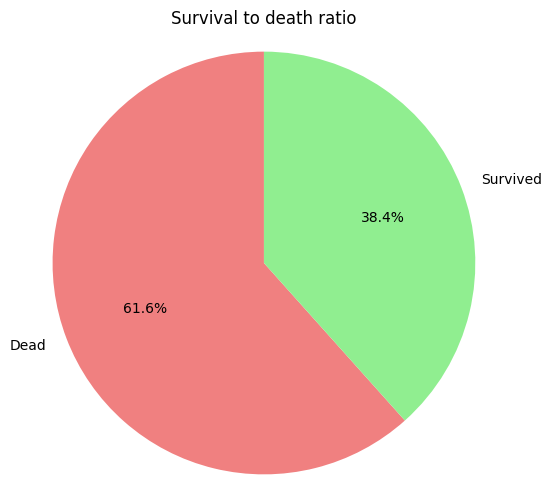

In [28]:
survival_counts = df['Survived'].value_counts()

labels = ['Dead', 'Survived']  # 0 - is not alive, 1 - alive

plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Survival to death ratio')
plt.axis('equal')
plt.show()

З результатів отриманої візулізації видно, що більшість (61.6%) людей загинули. 38.4% - залишились живими.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


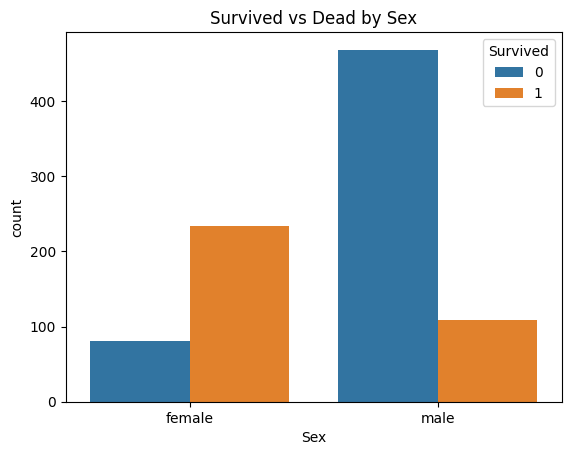

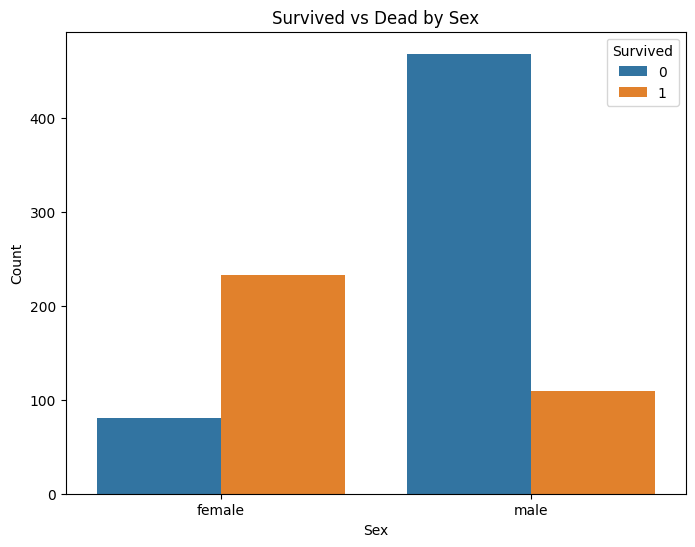

In [29]:

survival_by_sex = df.groupby(['Sex', 'Survived'], as_index=False).size()

plt.figure(figsize=(8, 6))
sns.barplot(data=survival_by_sex, x='Sex', y='size', hue='Survived')

plt.title('Survived vs Dead by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

plt.show()


За результатами графіку очевидно, шо більшість чоловіків та меншість жінок загинули, при цьому більшість з жінок та меншість з чоловіків вижили. 

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

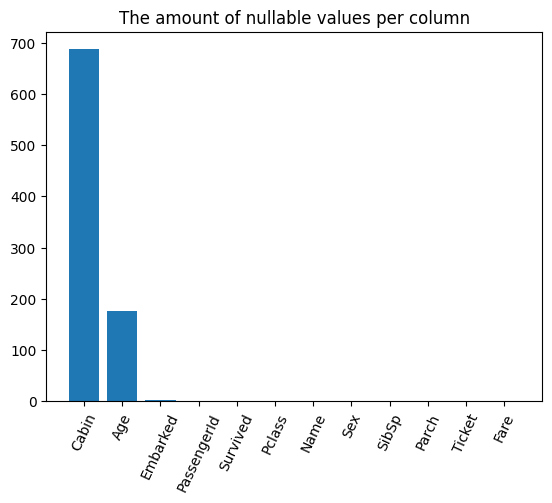

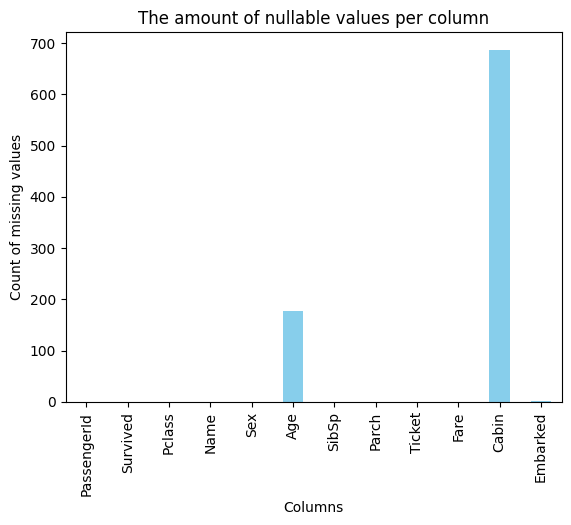

In [30]:
missing_values = df.isnull().sum()
missing_values.plot(kind='bar', color='skyblue')

plt.title('The amount of nullable values per column')
plt.xlabel('Columns')
plt.ylabel('Count of missing values')

plt.xticks(rotation=90)
plt.show()


Очевидно, що інформації про кабіни немає майже повністю, також загублена деяка інформація про вік людей.  

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

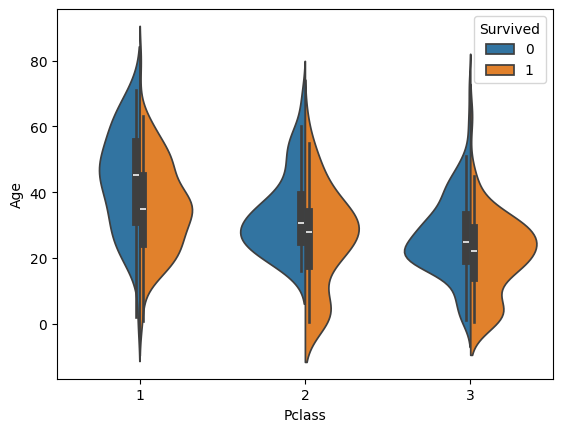

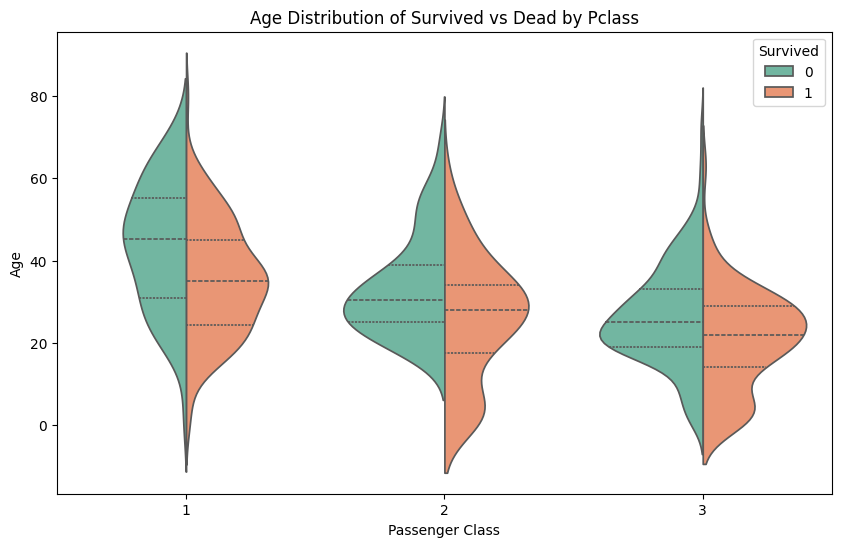

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, inner='quart', palette='Set2')

plt.title('Age Distribution of Survived vs Dead by Pclass')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

plt.show()


На графіках бачимо, що з 1го класу вижила більшість людей, вік яких сягає відмітки 30-55 років. При цьому, найбільше людей загинуло віком 22-45 років. 
З другого класу більшість людей, віком 25-40 - вижили, та загинули 18 - 35.
У третьому класі найбільше загинуло людей віком 15-30 років, та залишились живими - 20-35 років.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


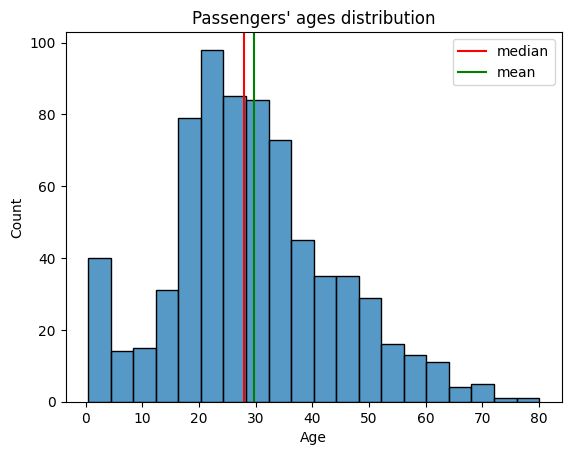

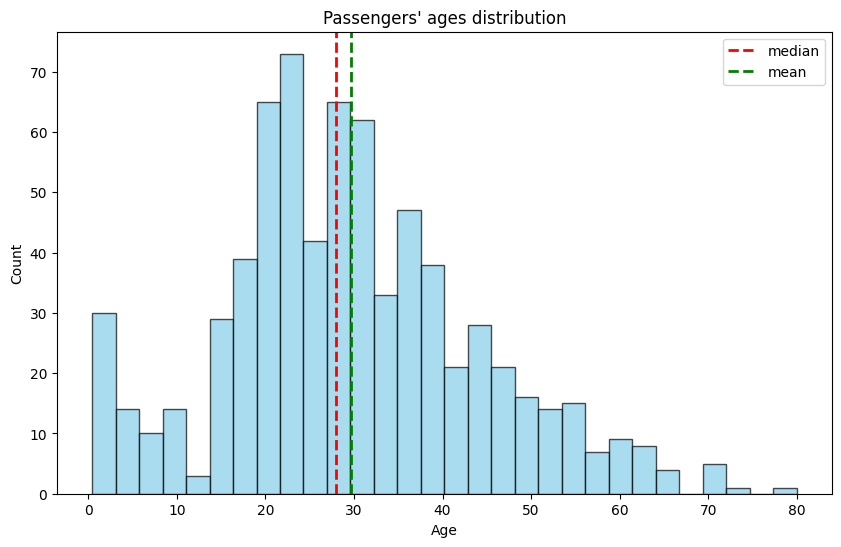

In [35]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Add lines for the median and mean
median_age = df['Age'].median()
mean_age = df['Age'].mean()

plt.axvline(median_age, color='red', linestyle='dashed', linewidth=2, label='median')
plt.axvline(mean_age, color='green', linestyle='dashed', linewidth=2, label='mean')

plt.title("Passengers' ages distribution")
plt.xlabel('Age')
plt.ylabel('Count')

plt.legend()
plt.show()


За результатами графіку бачимо, що медіана поширення людей сягає відмітки - 28-30 років, а середнє значення при цьому - 30 років.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

*питання до даних

In [ ]:
1.Пасажири якого класу мають найбільші шанси на виживання? - пасажири 1го класу.
2.Чи залежить шанс на виживання від статі пасажира? - жінки мали найбільше шансів на виживання, ніж чоловіки.
3.Як вік пасажирів впливає на їх шанси вижити? - пасажири молодших вікових груп мали найбільше шансів на виживання.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

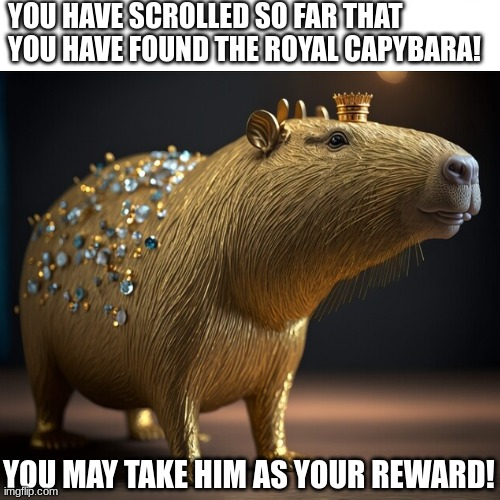